In [2]:
import numpy as np
import math
import ot
import matplotlib.pyplot as plt
from numpy import genfromtxt
from pathlib import Path

categories = ['bunny','calf','fish','hand','man','plane','pokemon','stingray','tool']
all_dist = []
all_dist.append(np.load('bunny.npy'))
all_dist.append(np.load('calf.npy'))
all_dist.append(np.load('fish.npy'))
all_dist.append(np.load('hand.npy'))
all_dist.append(np.load('man.npy'))
all_dist.append(np.load('plane.npy'))
all_dist.append(np.load('pokemon.npy'))
all_dist.append(np.load('stingray.npy'))
all_dist.append(np.load('tool.npy'))

In [3]:
# get barycenter for each category
barycenters = []
for category_dist in all_dist: 
    # regularization parameter
    reg = 0.0001
    examples = len(category_dist)
    weights = [1/examples for i in range(examples)]
    X = ot.bregman.convolutional_barycenter2d(category_dist, reg, weights)
    barycenters.append(X)

In [4]:
barycenters = np.array(barycenters)
print(barycenters.shape)

(9, 128, 128)


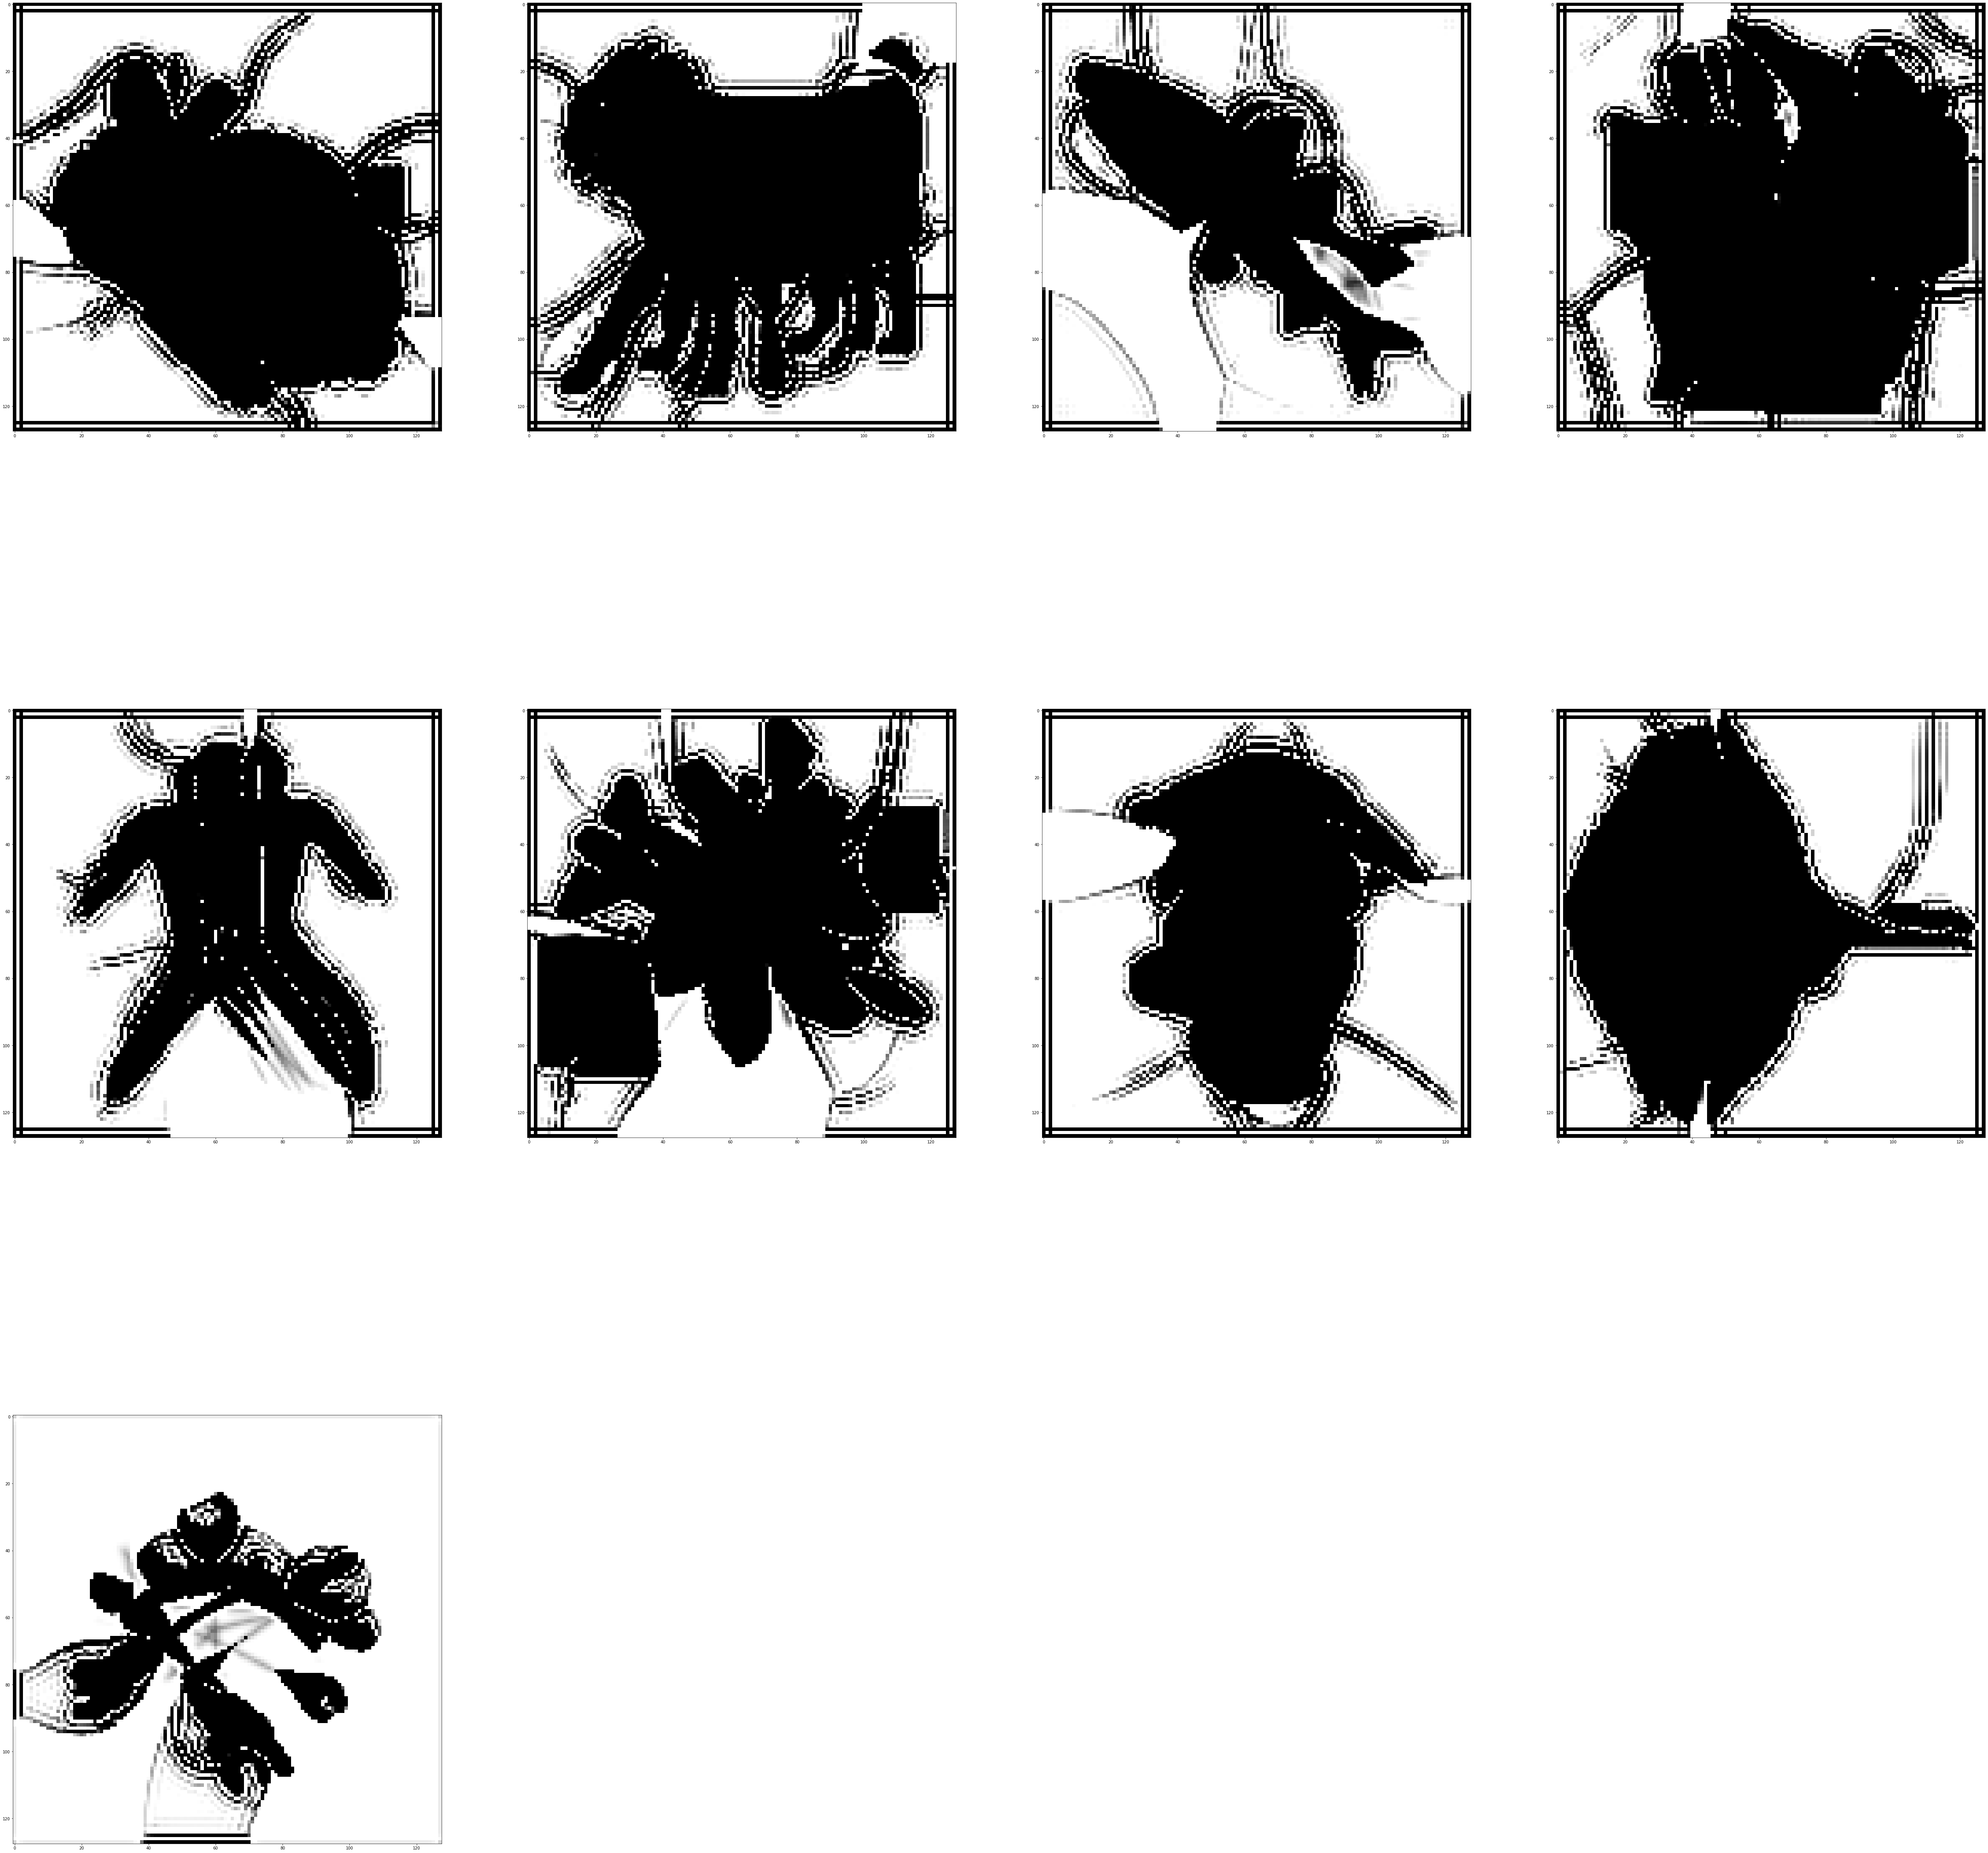

In [25]:
#reg 0.0001
plt.figure(figsize = (128,128))
bottom = 0.35
for i in range(len(barycenters)):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    # use average 1/128^2 as threshold
    plt.imshow(barycenters[i]*100,vmax=np.max(barycenters[0]),vmin = 0,cmap='gray')
# for img in barycenters:
#     plt.figure()
#     plt.imshow(img, vmin=0,vmax=np.max(barycenters[0]))

In [14]:
# a larger reg
barycenters2 = []
for category_dist in all_dist: 
    # regularization parameter
    reg = 0.002
    examples = len(category_dist)
    weights = [1/examples for i in range(examples)]
    X = ot.bregman.convolutional_barycenter2d(category_dist, reg, weights)
    barycenters2.append(X)

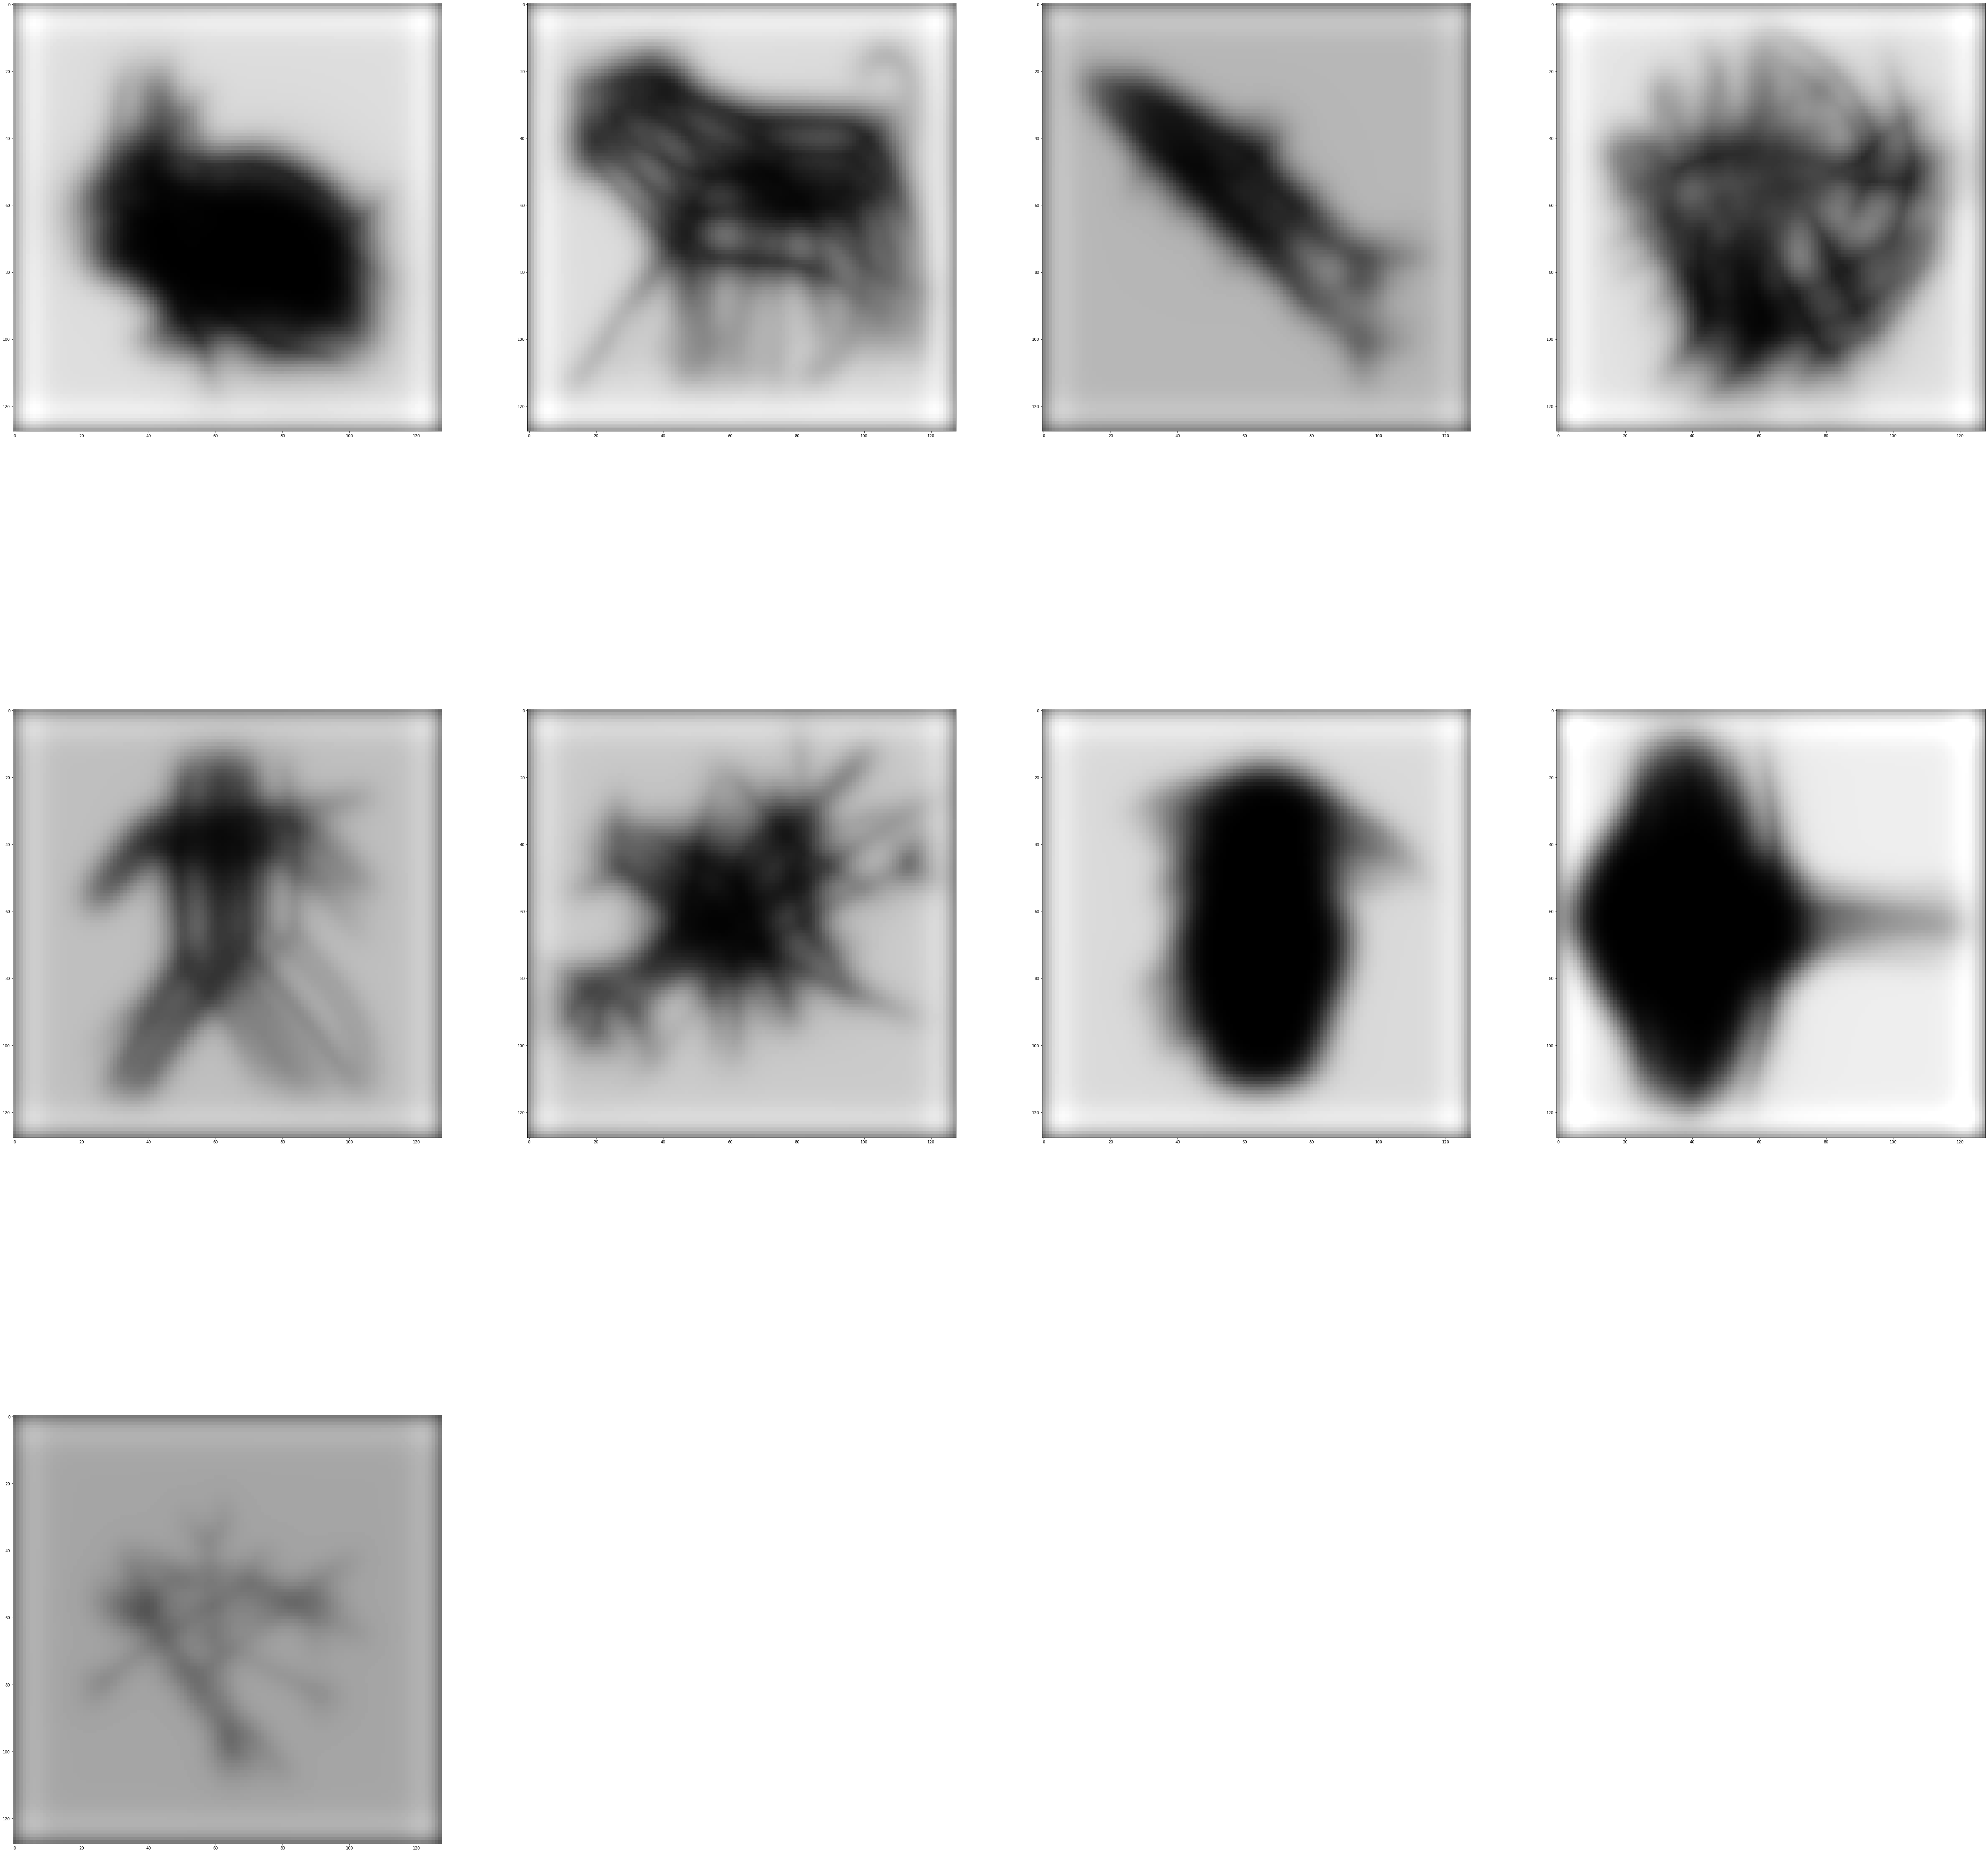

In [17]:
#reg 0.002
plt.figure(figsize = (128,128))
bottom = 0.35
for i in range(len(barycenters2)):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(barycenters2[i],vmax=np.max(barycenters2[0]),vmin = 0,cmap='gray')

In [23]:
# Euclidean norm for each category
barycentersE = []
for category_dist in all_dist: 
    temp = category_dist[0]
    for i in range(1, category_dist.shape[0]):
        temp+=category_dist[i]
    temp /= category_dist.shape[0]
    barycentersE.append(temp)
barycentersE = np.array(barycentersE)
print(barycentersE.shape)

(9, 128, 128)


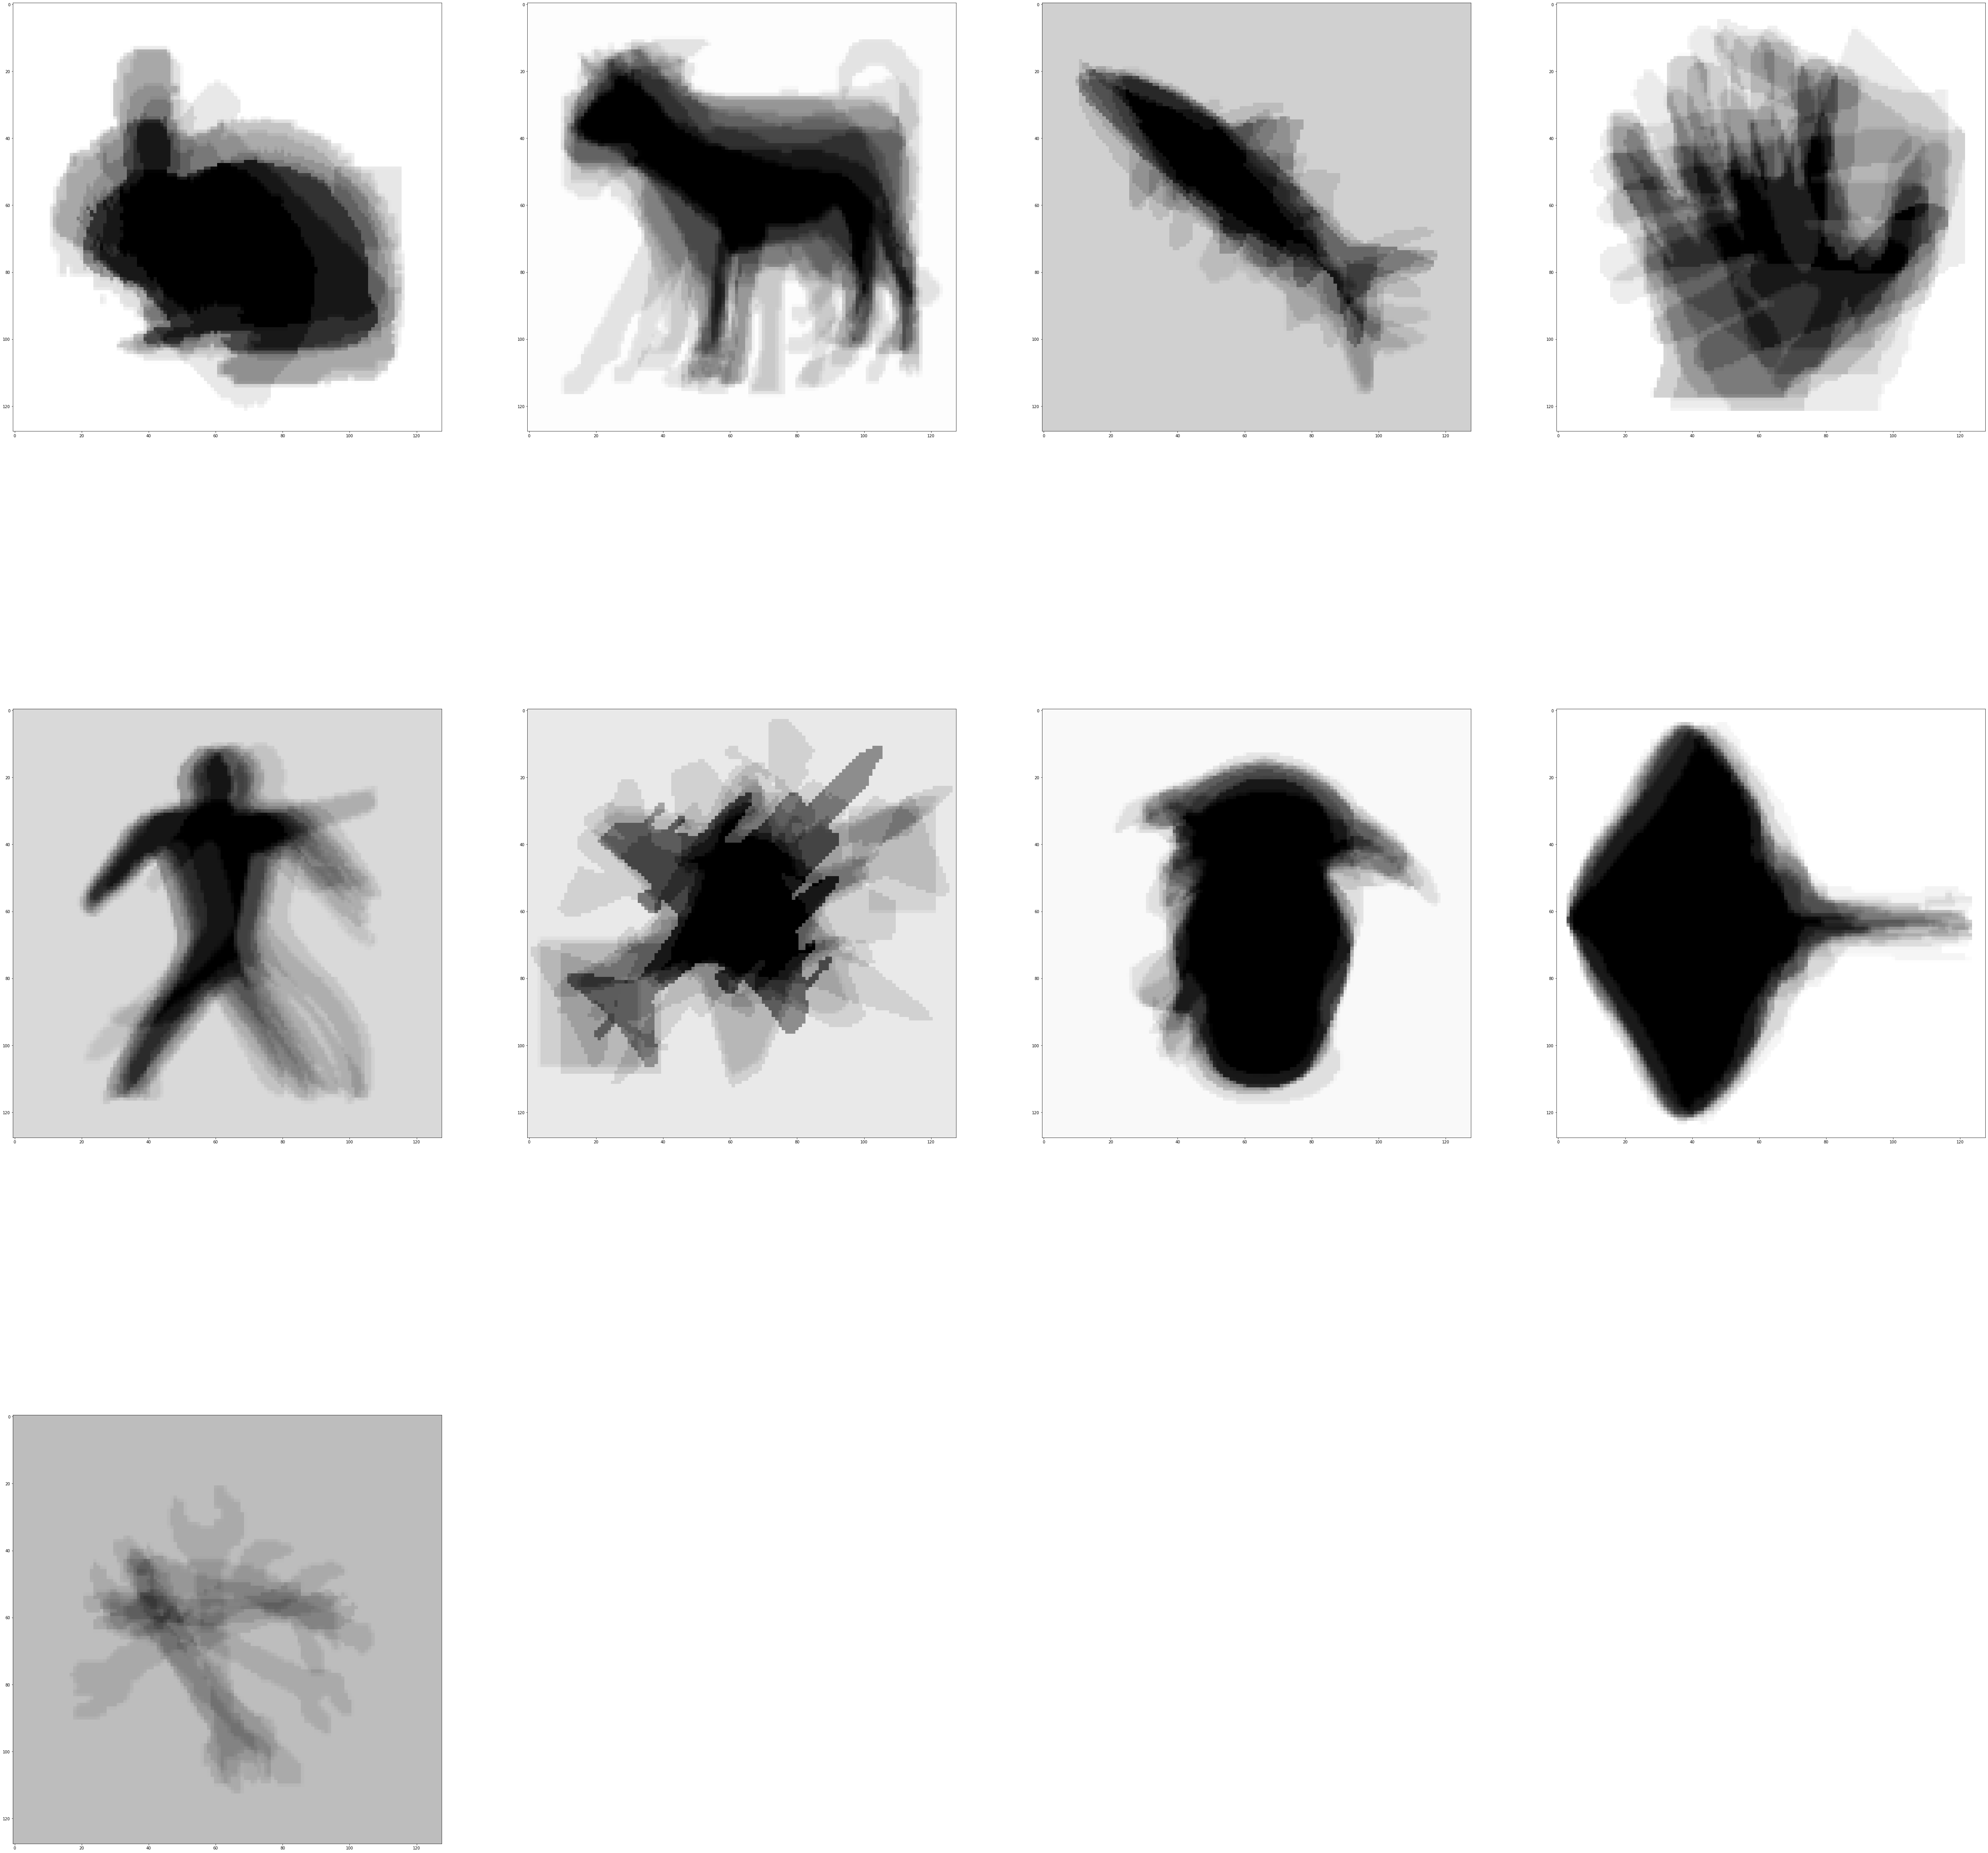

In [24]:
plt.figure(figsize = (128,128))
bottom = 0.35
for i in range(len(barycentersE)):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(barycentersE[i],vmax=np.max(barycentersE[0]),vmin = 0,cmap='gray')